In [1]:
import pandas as pd
import numpy as np
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
path = untar_data(URLs.FOOD)

In [4]:
bs = 64

In [7]:
len((path/'images/').ls())

102

In [8]:
df_train=pd.read_json(path/"train.json")
train_list=pd.DataFrame(df_train.values.flatten())
train_list["is_valid"]=False
train_list["label"]=train_list.iloc[:,0].str.split('/',expand=True)[0]
train_list.columns.values[0]="fname"


In [9]:
df_test=pd.read_json(path/"test.json")
test_list=pd.DataFrame(df_test.values.flatten())
test_list["is_valid"]=True
test_list["label"]=test_list.iloc[:,0].str.split('/',expand=True)[0]
test_list.columns.values[0]="fname"


In [10]:
train_list.head()

,fname,is_valid,label
0,churros/1004234,False,churros
1,hot_and_sour_soup/1002782,False,hot_and_sour_soup
2,samosa/1008131,False,samosa
3,sashimi/1001239,False,sashimi
4,pork_chop/1000802,False,pork_chop


In [11]:
test_list.head()

,fname,is_valid,label
0,churros/1061830,True,churros
1,hot_and_sour_soup/1000486,True,hot_and_sour_soup
2,samosa/1009326,True,samosa
3,sashimi/100113,True,sashimi
4,pork_chop/1012227,True,pork_chop


In [12]:
split_list=train_list.append(test_list)

In [13]:
src=(ImageList.from_df(split_list,path/'images',suffix='.jpg')
     .split_from_df(1)
     .label_from_df(cols="label"))

In [14]:
tfms = get_transforms(max_rotate=30,flip_vert=True)

In [15]:
def get_data(size, bs, padding_mode='reflection'):
    return (src
           .transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

AttributeError: train_ds

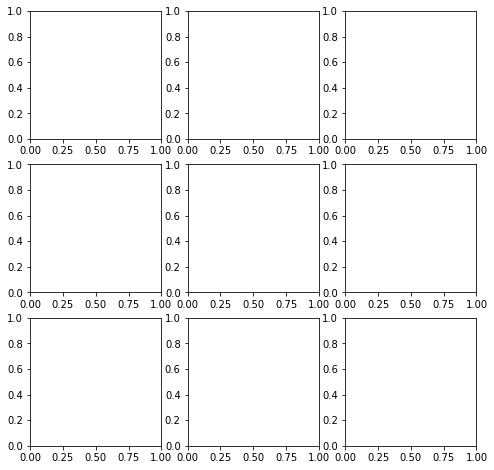

In [14]:
def _plot(i,j,ax):
    x,y = src.train_ds[0]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

In [71]:
#data = (src.transform(tfms, size=128)
#        .databunch().normalize(imagenet_stats))

In [57]:
vc_train = pd.value_counts(data.train_ds.y.items, sort=False)
vc_train.index = data.classes; vc_train

apple_pie               750
baby_back_ribs          750
baklava                 750
beef_carpaccio          750
beef_tartare            750
beet_salad              750
beignets                750
bibimbap                750
bread_pudding           750
breakfast_burrito       750
bruschetta              750
caesar_salad            750
cannoli                 750
caprese_salad           750
carrot_cake             750
ceviche                 750
cheese_plate            750
cheesecake              750
chicken_curry           750
chicken_quesadilla      750
chicken_wings           750
chocolate_cake          750
chocolate_mousse        750
churros                 750
clam_chowder            750
club_sandwich           750
crab_cakes              750
creme_brulee            750
croque_madame           750
cup_cakes               750
                       ... 
paella                  750
pancakes                750
panna_cotta             750
peking_duck             750
pho                 

In [58]:
vc_valid = pd.value_counts(data.valid_ds.y.items, sort=False)
vc_valid.index = data.classes; vc_valid

apple_pie               250
baby_back_ribs          250
baklava                 250
beef_carpaccio          250
beef_tartare            250
beet_salad              250
beignets                250
bibimbap                250
bread_pudding           250
breakfast_burrito       250
bruschetta              250
caesar_salad            250
cannoli                 250
caprese_salad           250
carrot_cake             250
ceviche                 250
cheese_plate            250
cheesecake              250
chicken_curry           250
chicken_quesadilla      250
chicken_wings           250
chocolate_cake          250
chocolate_mousse        250
churros                 250
clam_chowder            250
club_sandwich           250
crab_cakes              250
creme_brulee            250
croque_madame           250
cup_cakes               250
                       ... 
paella                  250
pancakes                250
panna_cotta             250
peking_duck             250
pho                 

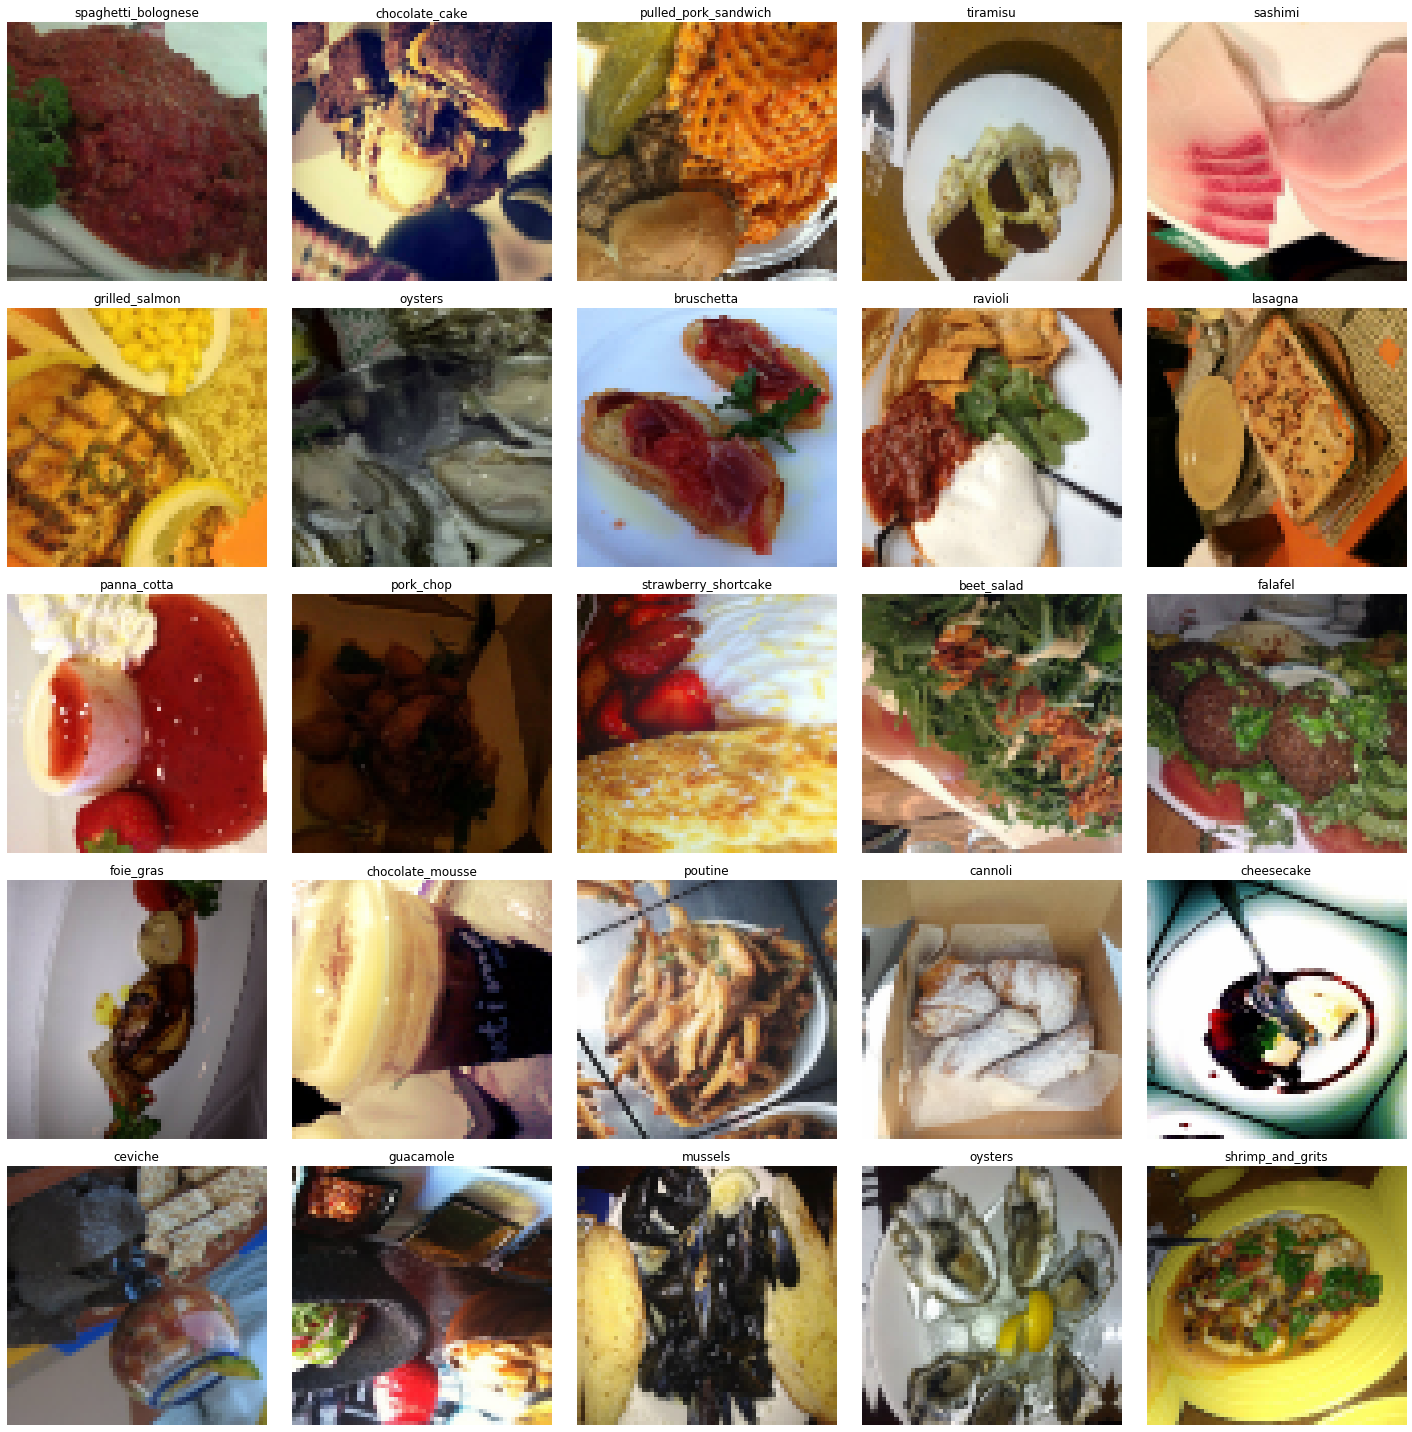

In [59]:
data.show_batch()

In [122]:
data = get_data(192, bs=64)

In [123]:
learn.purge()

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [18]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


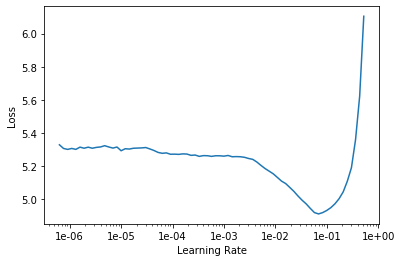

In [120]:
learn.lr_find()
learn.recorder.plot()

In [125]:
lr=1e-02
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.539279,1.894417,0.505386,05:11
1,2.352941,1.646399,0.566099,05:19
2,2.166060,1.499437,0.604990,05:18
3,1.953513,1.367532,0.637267,05:15
4,1.829754,1.329274,0.647644,05:20


In [127]:
learn.save('food-101-ResNet18-stage1')
learn.load('food-101-ResNet18-stage1')


Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


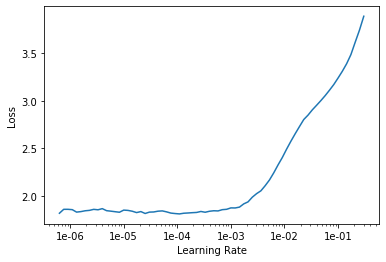

In [128]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [129]:
learn.fit_one_cycle(3, max_lr=slice(1e-05,2e-04))

epoch,train_loss,valid_loss,accuracy,time
0,1.783441,1.239023,0.667842,05:24
1,1.617588,1.109765,0.698653,05:16
2,1.551359,1.067094,0.707960,05:16


In [130]:
learn.fit_one_cycle(8, max_lr=slice(1e-05,2e-04))

epoch,train_loss,valid_loss,accuracy,time
0,1.526922,1.058515,0.710653,05:31
1,1.488485,1.037133,0.717267,05:20
2,1.512679,0.995364,0.726891,05:16
3,1.391619,0.946232,0.740911,05:17
4,1.302438,0.912797,0.748040,05:17
5,1.265249,0.878393,0.756950,05:14
6,1.215393,0.867828,0.761228,05:15
7,1.216970,0.863676,0.760832,05:15


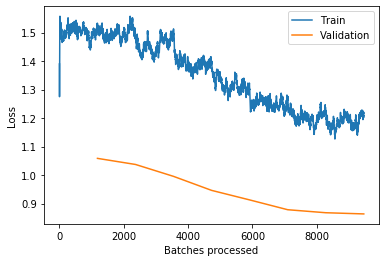

In [131]:
learn.recorder.plot_losses()

In [132]:
learn.save('food-101-ResNet18-stage2')



Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192),Image (3, 192, 192)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [143]:
learn.load('food-101-ResNet18-stage2')

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [142]:
#learn.purge()

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [17]:
data = get_data(384, bs=48)
learn.data = data

NameError: name 'learn' is not defined

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


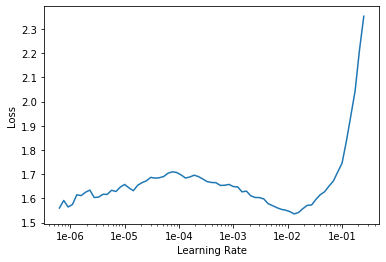

In [145]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [146]:
lr=1e-2/2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.288040,0.825321,0.767485,10:25
1,1.304021,0.797172,0.776673,10:25
2,1.205340,0.755278,0.787842,10:25
3,1.138868,0.713487,0.800238,10:25
4,1.087803,0.702526,0.803050,10:25


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



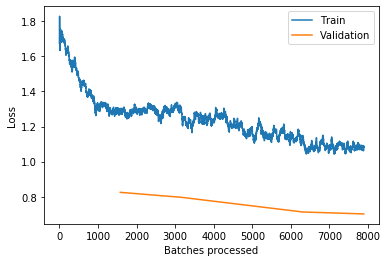

In [147]:
learn.recorder.plot_losses()

In [148]:
learn.save('food-101-ResNet18-stage3')



In [19]:
learn.load('food-101-ResNet18-stage3')

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


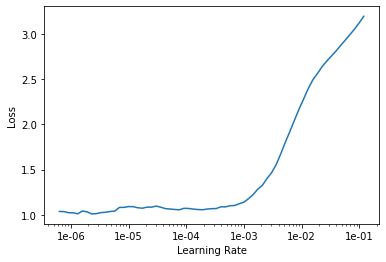

In [20]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(5, max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,1.095691,0.700182,0.800198,13:39
1,1.023715,0.684602,0.805901,13:15
2,1.025152,0.649583,0.815802,13:15
3,0.928034,0.615030,0.823683,13:14
4,0.907721,0.610845,0.825861,13:19


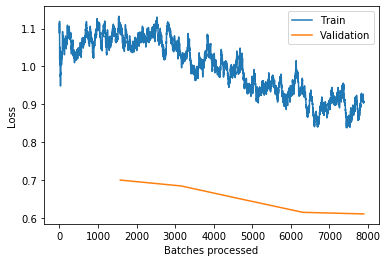

In [22]:
learn.recorder.plot_losses()

In [23]:
learn.save('food-101-ResNet18-stage4')



In [24]:
learn.load("food-101-ResNet18-stage4")

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [16]:
data = get_data(512, bs=56)
#learn.data = data

In [49]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy,top_k_accuracy],
                    pretrained=True).load("food-101-ResNet18-stage4").to_fp16()

In [50]:
gc.collect()

20

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


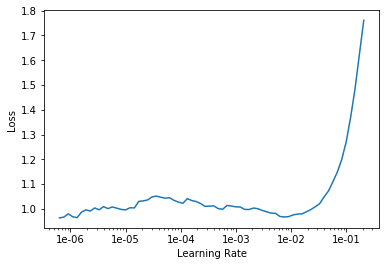

In [51]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [52]:
lr=3e-03
learn.fit_one_cycle(3,slice(lr))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.036256,0.670853,0.808673,0.958337,15:05
1,0.981429,0.643359,0.818178,0.959723,15:03
2,0.920795,0.629193,0.821307,0.961386,15:01


In [53]:
learn.save('food-101-ResNet18-stage5')



In [69]:
learn.load("food-101-ResNet18-stage5")

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [70]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


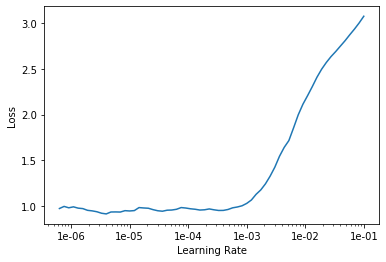

In [71]:
learn.lr_find()
learn.recorder.plot()

In [72]:

learn.fit_one_cycle(5,slice(1e-06,8e-05))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,0.910269,0.623546,0.824277,0.961782,24:04
1,0.929118,0.618460,0.824752,0.962337,24:05
2,0.862490,0.605397,0.828832,0.964713,24:06
3,0.901025,0.601126,0.829901,0.963960,24:05
4,0.843743,0.597825,0.830020,0.964634,24:04


In [73]:
learn.save('food-101-ResNet18-stage6_final')



In [27]:
learn.purge()

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padd

In [28]:
gc.collect()

20

In [34]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy,top_k_accuracy],
                    pretrained=True).load("food-101-ResNet18-stage6_final").to_fp32()

In [18]:
accuracy(*learn.TTA())


tensor(0.8348)

In [35]:
ds_tfms = ([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)], 
           [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)])


In [77]:
interp = ClassificationInterpretation.from_learner(learn)

In [89]:
interp.confusion_matrix().trace()

20952

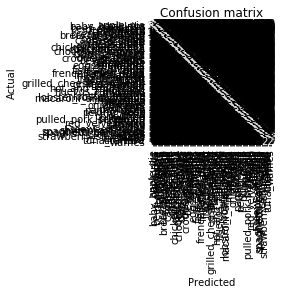

In [78]:
interp.plot_confusion_matrix()

In [82]:
losses,idxs = interp.top_losses()


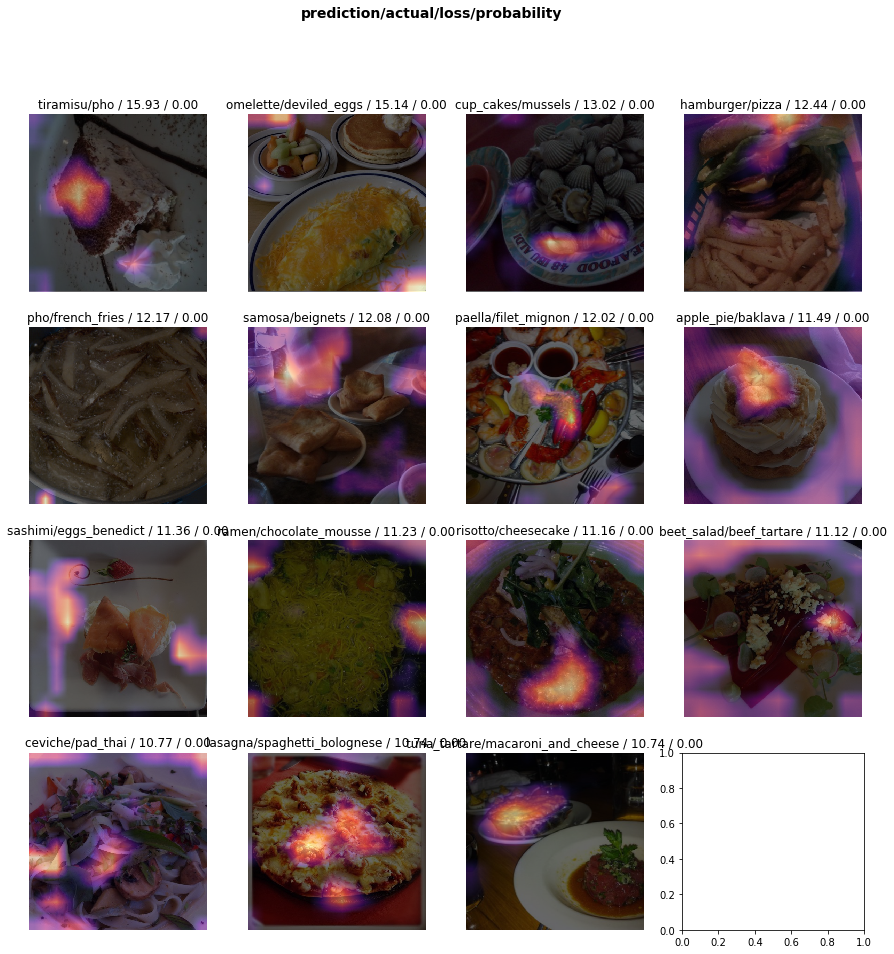

In [102]:
interp.plot_top_losses(15, figsize=(15,15))

In [90]:
interp.most_confused(min_val=2)

[('steak', 'filet_mignon', 46),
 ('filet_mignon', 'steak', 40),
 ('chocolate_mousse', 'chocolate_cake', 29),
 ('pork_chop', 'grilled_salmon', 26),
 ('steak', 'prime_rib', 22),
 ('apple_pie', 'bread_pudding', 21),
 ('chocolate_cake', 'chocolate_mousse', 21),
 ('falafel', 'crab_cakes', 21),
 ('tiramisu', 'chocolate_mousse', 21),
 ('beef_tartare', 'tuna_tartare', 20),
 ('steak', 'pork_chop', 20),
 ('breakfast_burrito', 'huevos_rancheros', 18),
 ('filet_mignon', 'prime_rib', 18),
 ('gnocchi', 'ravioli', 18),
 ('pork_chop', 'steak', 18),
 ('prime_rib', 'steak', 18),
 ('tuna_tartare', 'beef_tartare', 17),
 ('bread_pudding', 'apple_pie', 16),
 ('breakfast_burrito', 'chicken_quesadilla', 16),
 ('dumplings', 'gyoza', 16),
 ('chicken_quesadilla', 'breakfast_burrito', 15),
 ('grilled_cheese_sandwich', 'club_sandwich', 15),
 ('ice_cream', 'frozen_yogurt', 15),
 ('lobster_bisque', 'clam_chowder', 15),
 ('tiramisu', 'chocolate_cake', 15),
 ('cheesecake', 'strawberry_shortcake', 14),
 ('hamburger', '